In [624]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [625]:
#Constants
a,w,v,K,tau,beta,gamma=1e-3,0.8,0.024,10,30,100,10
rho=0.005
sigma=12
modFrequency=0.0035
m=0.2

In [626]:
#Numerical intergrator settings
t_start=0
t_end=1000000
transient=200000
t_eval=np.linspace(t_start, t_end, 10000000)

initialState=[0.1,0,1,12]

In [627]:
#ODE model for chemostat
def odeModel(t,y):
    F=sigma*(1-(m/2)*(1+np.sin(modFrequency*t)))

    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho+a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(F-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

In [628]:
def planeIntersection(t,y):
    return y[0] - 0.2

In [629]:
def poincareSection(transient,t_s,t_e,i_state,integrator,rtol,atol):
    solution = solve_ivp(odeModel,
                     [t_s,t_e],
                     i_state,method=integrator, events=planeIntersection, rtol=rtol,atol=atol)
    
    if solution.y_events[0].size>0:
        temp=solution.t_events[0]>transient
        solutionPoints=solution.y_events[0][temp]

    return solutionPoints[:, 0],solutionPoints[:, 1],solutionPoints[:, 2],solutionPoints[:, 3]

In [630]:
#Plot population of non infected bacteria against time
planeIntersection.terminal=False 
planeIntersection.direction=1

B_p,I_p,P_p,S_p=poincareSection(transient,t_start,t_end,initialState,'LSODA',1e-8,1e-11)

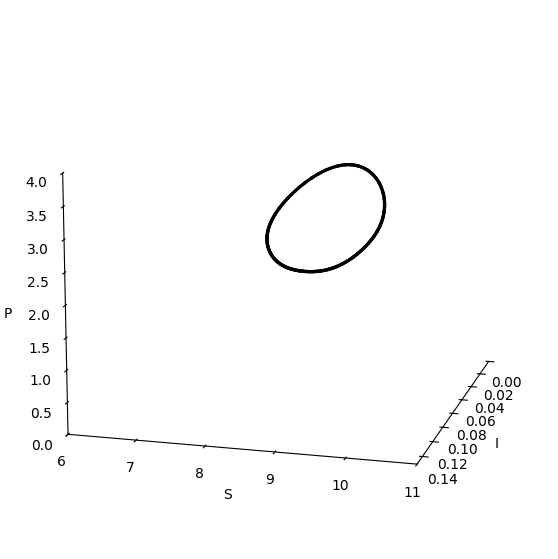

In [631]:
#Plot poincare section
fig=plt.figure(figsize=(7,7))
ax =fig.add_subplot(projection='3d')

ax.scatter(I_p,S_p,P_p,color='black',marker='o',s=2,alpha=0.8)
ax.view_init(elev=15, azim=15)
ax.grid(False)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim(0, 0.15)
ax.set_ylim(6, 11)
ax.set_zlim(0, 4)

ax.set_xlabel("I")
ax.set_ylabel("S")
ax.set_zlabel("P")
plt.show()